<hr>
    <hr>
<h1><b>TASK 7: HANDWRITTEN NUMBERS DETECTION</b></h1>

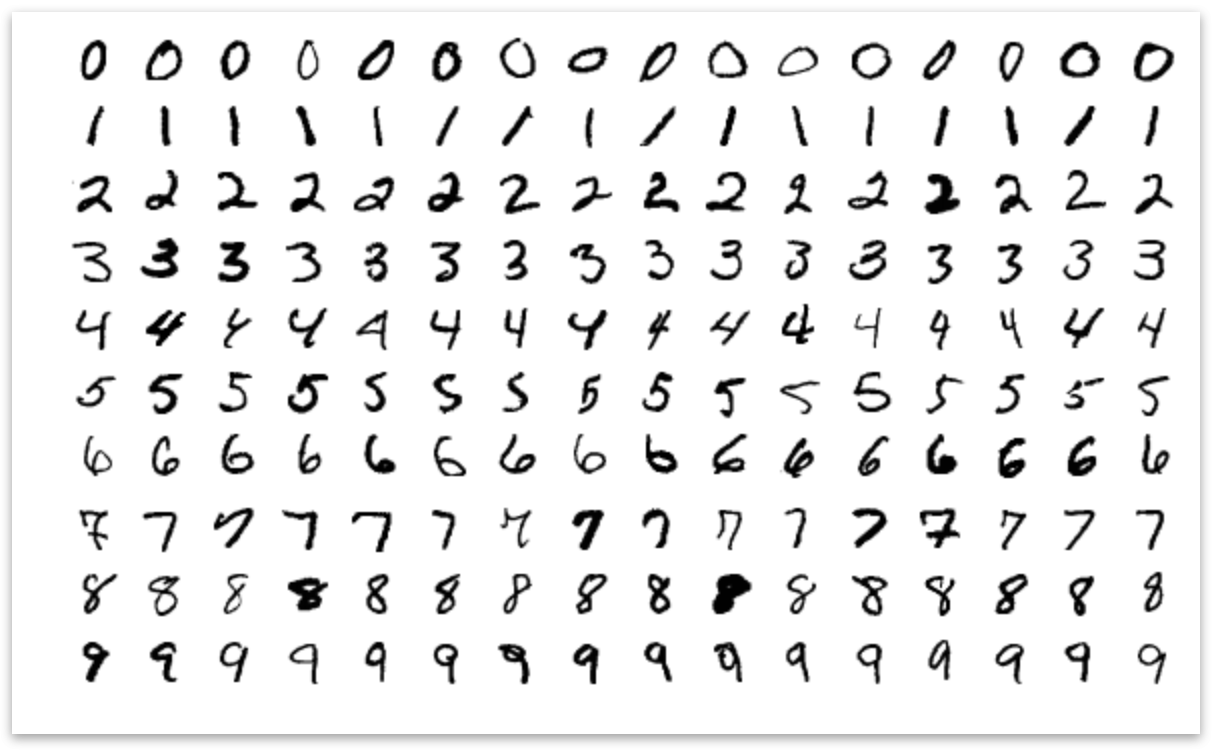
    <hr>
<hr>

- <b>Importing Libraries 👇

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

- <b>Load Dataset 👇

In [2]:
def load_ds():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test

- <b>Scale pixels👇


In [3]:
def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

- <b>CNN MODEL👇

In [4]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


- <b>Cross-Validation (k-fold)👇

In [5]:
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_ix, test_ix in kfold.split(dataX):
        model = define_model()
        X_train, y_train, X_test, y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

- <b>Summarise👇

In [6]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [7]:
def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.boxplot(scores)
    plt.show()

- <b>Test Harness👇

In [8]:
def run_test_harness():
    X_train, y_train, X_test, y_test = load_ds()
    X_train, X_test = prep_pixels(X_train, X_test)
    scores, histories = evaluate_model(X_train, y_train)
    summarize_diagnostics(histories)
    summarize_performance(scores)


> 99.008
> 98.933
> 98.800
> 99.150
> 98.892


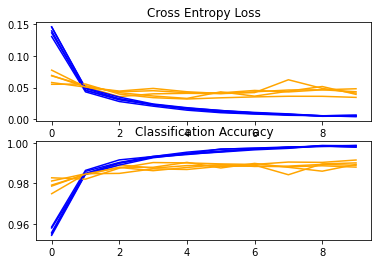

Accuracy: mean=98.957 std=0.118, n=5


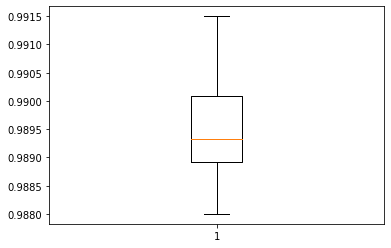

In [9]:
run_test_harness()

In [10]:
def run_test_harness1():
    X_train, y_train, X_test, y_test = load_ds()
    X_train, X_test = prep_pixels(X_train, X_test)
    model = define_model()
    model.fit(X_train,y_train,epochs = 10,batch_size = 32,verbose =0)
    model.save('final_model.h5')
    

In [11]:
run_test_harness1()

- <b>Evaluate Final Model 👇

In [12]:
from tensorflow.keras.models import load_model
def run_test_harness2():
    X_train, y_train, X_test, y_test = load_ds()
    X_train, X_test = prep_pixels(X_train, X_test)
    model = load_model('final_model.h5')
    _,acc = model.evaluate(X_test,y_test,verbose = 0)
    print(f"Accuracy:  >  %{round(acc*100.0,4)}",)

In [44]:
run_test_harness2()

Accuracy:  >  %99.21


- <b>Importing the image 👇

In [45]:
from numpy import argmax
from keras.utils import load_img,img_to_array
from keras.models import load_model

In [46]:
def load_image(fn): 
    img = load_img(fn,color_mode='grayscale',target_size = (28,28))
    img = img_to_array(img)
    img = img.reshape(1,28,28,1)
    img = img.astype('float32')
    img = img/255.0
    return img

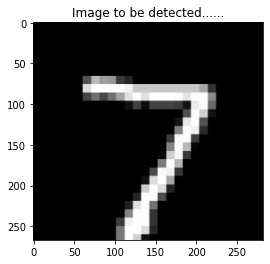

In [57]:
import cv2

imgz = cv2.imread("img_ex.png")
orig_img = imgz[:,:,::-1]
plt.title('Image to be detected......')
plt.imshow(orig_img)
plt.show()

- <b> Printing the image number in digits 👇

In [58]:
img = load_image('img_ex.png')
model = load_model('final_model.h5')
pred_val = model.predict(img)
dig = argmax(pred_val)

1/1 [==============================] - 3s 3s/step


In [59]:
print("The digit from the above image is: " ,dig)

The digit from the above image is:  7
